# FIFA 19 ULTIMATE TEAM PLAYERS ANALYSIS

**Thành viên**: 
- **1753022 - Đặng Viết Khôi Nguyên**
- **18127229 - Lê Minh Tiến**

<img src="imgs/banner_width.jpg" width="1000"/>

## Import 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
from sklearn.neighbors import KNeighborsClassifier
set_config(display='diagram') # Để trực quan hóa pipeline

In [61]:
pd.set_option('display.max_columns', None)

## Dữ liệu

Đây là bộ dữ liệu về chỉ số cầu thủ được lấy bằng API https://www.easports.com/fifa/ultimate-team/api/fut/item của nhà phát hành Electronic Arts Inc., cha để của tự game nổi tiếng FIFA. Dữ liệu này chứa các thông tin về cầu thủ có trong tựa game FIFA 19 Ultimate Team và các đặc điểm sẽ được mô tả ngay sau đây.

Trước tiên, ta sẽ quan sát dữ liệu.

In [62]:
df = pd.read_csv('../data/FUT.csv')
df.head()

,commonName,firstName,lastName,position,composure,height,weight,birthdate,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,traits,specialities,atkWorkRate,defWorkRate,attributes,name,rarityId,isIcon,quality,isGK,positionFull,id,baseId,rating
0,Cristiano Ronaldo,C. Ronaldo,dos Santos Aveiro,ST,99,187,83,02/05/1985,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Cristiano Ronaldo,5,False,gold,False,Striker,100684097,20801,99
1,NaN,Luka,Modrić,CM,91,172,66,09/09/1985,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,"['Leadership', 'Long Passer (CPU AI Only)', 'L...","['Dribbler', 'Play Maker', 'Distance Shooter',...",High,High,"[{'name': 'fut.attribute.PAC', 'value': 90, 'c...",Modrić,5,False,gold,False,Centre Midfielder,100840299,177003,99
2,Cristiano Ronaldo,C. Ronaldo,dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,66,False,gold,False,Striker,184570177,20801,99
3,NaN,Lionel,Messi,CF,99,170,72,06/24/1987,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,"['Finesse Shot', 'Long Shot Taker (CPU AI Only...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",Medium,Medium,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Messi,5,False,gold,False,Centre Forward,184707399,158023,99
4,Cristiano Ronaldo,C. Ronaldo,dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,18,False,gold,False,Striker,201347393,20801,99


### Dữ liệu có bao nhiêu dòng và cột?

In [63]:
df.shape

(21792, 60)

### Các cột bên trong dữ liệu chứa những thông tin gì?

In [64]:
df.columns

Index(['commonName', 'firstName', 'lastName', 'position', 'composure',
       'height', 'weight', 'birthdate', 'age', 'acceleration', 'aggression',
       'agility', 'balance', 'ballcontrol', 'foot', 'skillMoves', 'crossing',
       'curve', 'dribbling', 'finishing', 'freekickaccuracy', 'gkdiving',
       'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes',
       'headingaccuracy', 'interceptions', 'jumping', 'longpassing',
       'longshots', 'marking', 'penalties', 'positioning', 'potential',
       'reactions', 'shortpassing', 'shotpower', 'slidingtackle',
       'sprintspeed', 'standingtackle', 'stamina', 'strength', 'vision',
       'volleys', 'weakFoot', 'traits', 'specialities', 'atkWorkRate',
       'defWorkRate', 'attributes', 'name', 'rarityId', 'isIcon', 'quality',
       'isGK', 'positionFull', 'id', 'baseId', 'rating'],
      dtype='object')

Sau khi quan sát tập dữ liệu và các cột, có thể mô tả dữ liệu như sau:
- **commonName**: tên thông thường của cầu thủ
- **firstName**: tên của cầu thủ
- **lastName**: họ của cầu thủ
- **position**: vị trí của cầu thủ
- **composure**: chỉ số điềm tĩnh 
- **height**: chiều cao 
- **weight**: cân nặng 
- **birthdate**: ngày tháng năm sinh
- **age**: tuổi 
- **acceleration**: chỉ số tăng tốc
- **aggression**: chỉ số nhiệt huyết
- **agility**: chỉ số nhanh nhẹn
- **balance**: chỉ số cân bằng
- **ballcontrol**: chỉ số kiểm soát bóng
- **foot**: mô tả chân thuận
- **skillMoves**: chỉ số kỹ thuật
- **crossing**: chỉ số chuyền bóng
- **curve**: chỉ số đá xoáy
- **dribbling**: chỉ số dẫn bóng
- **finishing**: chỉ số dứt điểm
- **freekickaccuracy**: chỉ số đá phạt gián tiếp
- **gkdiving**: chỉ số đổ người (thủ môn)
- **gkhandling**: chỉ số ôm bóng (thủ môn)
- **gkkicking**: chỉ số phát bóng (thủ môn)
- **gkpositioning**: chỉ số chọn vị trí và phán đoán ra vào (thủ môn)
- **gkreflexes**: chỉ số phản xạ (thủ môn)
- **headingaccuracy**: chỉ số đánh đầu
- **interceptions**: chỉ số tắt bóng
- **jumping**: chỉ số nhảy
- **longpassing**: chỉ số chuyền dài
- **longshots**: chỉ số sút xa
- **marking**: chỉ số theo người
- **penalties**: chỉ số sút phạt đền
- **positioning**: chỉ số chọn vị trí
- **potential**: chỉ số tiềm năng
- **reactions**: chỉ số phản ứng
- **shortpassing**: chỉ số chuyền ngắn
- **shotpower**: chỉ số lực sút
- **slidingtackle**: chỉ số xoạc bóng
- **sprintspeed**: chỉ số tốc độ nước rút
- **standingtackle**: chỉ số tranh chấp bóng tại chỗ
- **stamina**: chỉ số thể lực
- **strength**: chỉ số sức mạnh
- **vision**: chỉ số tầm nhìn
- **volleys**: chỉ số volley (đá bóng sống)
- **weakFoot**: chỉ số sử dụng chân không thuận
- **traits**: đặc điểm cầu thủ (thuộc về AI của game)
- **specialities**: kĩ năng đặc biệt (thuộc về AI của game)
- **atkWorkRate**: tần suất tham gia tấn công
- **defWorkRate**: tần suất tham gia phòng thủ
- **attributes**: miêu tả thuộc tính cầu thủ (thuộc về xử lý dữ liệu của game)
- **name**: tên in-game của cầu thủ
- **rarityId**: độ hiếm
- **isIcon**: có phải cầu thủ huyền thoại (thẻ cầu thủ)
- **quality**: chất thẻ cầu thủ (vàng, bạc, đồng)
- **isGK**: có phải thủ môn không
- **positionFull**: tên vị trí đầy đủ của cầu thủ
- **id**: ID cầu thủ (sử dụng cho game)
- **baseId**: ID gốc của cầu thủ (sử dụng cho game)
- **rating**: chỉ số tổng của cầu thủ


Sau khi có cái nhìn sơ bộ, ta tiến hành đánh giá bài toán và xử lý các thuộc tính của dữ liệu để phù hợp cho bài toán đặt ra.

## Bài toán

Để đặt ra bài toán, ta cần biết được output chúng ta mong muốn là gì. Với bộ dữ liệu như trên, ta có thể xác định một số bài toán cụ thể như:
- Phân loại vị trí của cầu thủ - output là thuộc tính **position** (đây là bài toán sẽ được giải quyết trong notebook này)
- Dự đoán tuổi của cầu thủ - output là thuộc tính **age**
- Dự đoán chỉ số tổng của cầu thủ - output là thuộc tính **rating**

## Quan sát và xử lý các thuộc tính của dữ liệu

### Chọn thuộc tính đại diện cho dữ liệu

Qua quan sát, ta có thể thấy thuộc tính **commonName** không xuất hiện trên tất cả các cầu thủ mà chỉ xuất hiện ở các cầu thủ có tên đầy đủ khá dài để cho người chơi dễ dàng tìm kiếm và theo dõi cầu thủ của mình. Chúng ta quan sát số lượng cầu thủ không có thuộc tính **commonName**. 

In [65]:
df.commonName.isna().sum()

18253

Kết quả cho thấy đa số các cầu thủ không có dữ liệu cho thuộc tính **commonName**. Tuy nhiên, chúng ta cần có một thuộc tính đủ khả năng đại diện cho một cầu thủ bất kỳ, vì thế thuộc tính **commonName** là không phù hợp. Ngoài ra, chúng ta có thể tạo một thuộc tính mới bằng việc kết hợp 2 thuộc tính **firstName** và **lastName** thành thuộc tính **fullName** và thuộc tính này có khả năng đại diện cho một cầu thủ. Do đó, ta thực hiện những công việc sau:
- Bỏ cột **commonName** ra khỏi tập dữ liệu.
- Thêm cột **fullName** bằng việc kết hợp **firstName** và **lastName**, sau đó bỏ **firstName** và **lastName** ra khỏi tập dữ liệu.

In [66]:
df['fullName'] = df['firstName'] + ' ' + df['lastName']
cols = df.columns.to_list()
new_cols = cols[-1:] + cols[3:-1]
new_df = df[new_cols]
new_df

,fullName,position,composure,height,weight,birthdate,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,traits,specialities,atkWorkRate,defWorkRate,attributes,name,rarityId,isIcon,quality,isGK,positionFull,id,baseId,rating
0,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Cristiano Ronaldo,5,False,gold,False,Striker,100684097,20801,99
1,Luka Modrić,CM,91,172,66,09/09/1985,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,"['Leadership', 'Long Passer (CPU AI Only)', 'L...","['Dribbler', 'Play Maker', 'Distance Shooter',...",High,High,"[{'name': 'fut.attribute.PAC', 'value': 90, 'c...",Modrić,5,False,gold,False,Centre Midfielder,100840299,177003,99
2,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,66,False,gold,False,Striker,184570177,20801,99
3,Lionel Messi,CF,99,170,72,06/24/1987,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,"['Finesse Shot', 'Long Shot Taker (CPU AI Only...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",Medium,Medium,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Messi,5,False,gold,False,Centre Forward,184707399,158023,99
4,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,18,False,gold,False,Striker,201347393,20801,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21787,Xin Wang,RWB,33,182,70,11/10/1997,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,NaN,NaN,High,Medium,"[{'name': 'fut.attribute.PAC', 'value': 61, 'c...",Wang Xin,0,False,bronze,False,Right Wing Back,242852,242852,48
21788,Lei Wu,CDM,39,184,72,07/01/1997,24,64,54,55,53,40,Right,2,52,41,45,29,32,8,15,11,8,5,41,40,57,44,34,52,46,53,58,48,50,52,49,57,40,56,62,45,30,3,NaN,NaN,Medium,Medium,"[{'name': 'fut.attribute.PAC', 'value': 60, 'c...",Wu Lei,0,False,bronze,False,Centre Defensive Midfielder,243112,243112,48
21789,Morgan Roberts,LM,47,178,68,12/22/2000,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,NaN,NaN,Medium,Low,"[{'name': 'fut.attribute.PAC', 'value': 65, 'c...",Roberts,0,False,bronze,False,Left Midfielder,243204,243204,48
21790,Callum Hawkins,GK,37,188,75,12/12/1999,21,22,18,25,38,16,Left,1,13,13,14,9,11,53,45,56,49,46,10,6,47,15,5,16,15,5,65,35,24,20,12,31,10,22,41,30,6,3,NaN,NaN,Medium,Medium,"[{'name': 'fut.attribute.DIV', 'value': 53, 'c...",Hawkins,0,False,bronze,True,Goalkeeper,243636,243636,48


#### Vì sao có nhiều cầu thủ trùng nhau?

Qua quan sát, ta có thể thấy tập dữ liệu xuất hiện một số cầu thủ trùng nhau, tiến hành kiểm tra có bao nhiêu cầu thủ trùng nhau.

In [67]:
new_df.duplicated(subset='fullName').sum()

6267

Kết quả cho thấy có khá nhiều cầu thủ trùng nhau, liệu có cách giải thích nào cho việc này? Ta thử nghiệm bằng cách tìm các phiên bản trùng nhau của một cầu thủ bất kỳ (cụ thể là C. Ronaldo).

In [68]:
new_df[new_df.fullName == 'C. Ronaldo dos Santos Aveiro']

,fullName,position,composure,height,weight,birthdate,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,traits,specialities,atkWorkRate,defWorkRate,attributes,name,rarityId,isIcon,quality,isGK,positionFull,id,baseId,rating
0,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Cristiano Ronaldo,5,False,gold,False,Striker,100684097,20801,99
2,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,66,False,gold,False,Striker,184570177,20801,99
4,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,18,False,gold,False,Striker,201347393,20801,99
9,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,92,67,91,73,99,Right,5,89,86,92,99,80,7,11,15,14,11,99,33,99,81,98,32,89,99,94,99,86,99,26,95,35,94,85,87,91,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 94, 'c...",Cristiano Ronaldo,21,False,gold,False,Striker,50352449,20801,98
11,C. Ronaldo dos Santos Aveiro,LW,99,187,83,02/05/1985,36,92,67,91,73,99,Right,5,89,86,92,99,80,7,11,15,14,11,99,33,99,81,98,32,89,99,94,99,86,99,26,95,35,94,85,87,91,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 94, 'c...",Cristiano Ronaldo,70,False,gold,False,Left Wing,167792961,20801,98
24,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Cristiano Ronaldo,5,False,gold,False,Striker,100684097,20801,99
26,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,66,False,gold,False,Striker,184570177,20801,99
28,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,97,74,95,77,99,Right,5,97,94,96,99,88,7,11,15,14,11,99,41,99,89,99,40,90,99,94,99,94,99,32,99,44,99,93,95,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 99, 'c...",Cristiano Ronaldo,18,False,gold,False,Striker,201347393,20801,99
33,C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,92,67,91,73,99,Right,5,89,86,92,99,80,7,11,15,14,11,99,33,99,81,98,32,89,99,94,99,86,99,26,95,35,94,85,87,91,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'A

Theo kết quả trên, ta quan sát được rằng, các phiên bản C. Ronaldo có các thuộc tính cơ bản như vị trí, tuổi, chiều cao và cân nặng là giống nhau, tuy nhiên chỉ số của mỗi phiên bản là khác nhau. Có thể giải thích điều này qua việc, đây là dữ liệu cầu thủ có trong game FIFA 19 nên nhà phát hành đã cho ra nhiều phiên bản khác nhau của cầu thủ qua từng sự kiện khác nhau (có thể dựa theo các sự kiện và màn trình diễn thực tế ở ngoài đời), giúp cho game thủ có nhiều lựa chọn về phiên bản cầu thủ (thẻ cầu thủ) hơn.

Để làm cho dữ liệu sát với đời thật nhất, ta giữ lại cầu thủ có chỉ số cao nhất và bỏ đi các dữ liệu trùng (dữ liệu đã được sắp xếp theo thứ tự chỉ số tổng giảm dần nên ta có thể xử lý bằng cách giữ lại phiên bản xuất hiện đầu tiên của cầu thủ), sau đỏ điều chỉnh cột **fullName** thành index để đại diện cho mỗi cầu thủ.

In [69]:
new_df = new_df.drop_duplicates(subset='fullName', keep='first')
new_df = new_df.set_index('fullName')
new_df

,position,composure,height,weight,birthdate,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,traits,specialities,atkWorkRate,defWorkRate,attributes,name,rarityId,isIcon,quality,isGK,positionFull,id,baseId,rating
fullName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C. Ronaldo dos Santos Aveiro,ST,99,187,83,02/05/1985,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,"['Power Free-Kick', 'Flair', 'Long Shot Taker ...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",High,Low,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Cristiano Ronaldo,5,False,gold,False,Striker,100684097,20801,99
Luka Modrić,CM,91,172,66,09/09/1985,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,"['Leadership', 'Long Passer (CPU AI Only)', 'L...","['Dribbler', 'Play Maker', 'Distance Shooter',...",High,High,"[{'name': 'fut.attribute.PAC', 'value': 90, 'c...",Modrić,5,False,gold,False,Centre Midfielder,100840299,177003,99
Lionel Messi,CF,99,170,72,06/24/1987,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,"['Finesse Shot', 'Long Shot Taker (CPU AI Only...","['Speedster', 'Aerial Threat', 'Dribbler', 'Di...",Medium,Medium,"[{'name': 'fut.attribute.PAC', 'value': 97, 'c...",Messi,5,False,gold,False,Centre Forward,184707399,158023,99
Edson Arantes Nascimento,CAM,98,173,70,10/23/1940,80,95,59,94,93,97,Right,5,90,89,96,98,89,13,6,11,8,7,94,67,88,88,94,55,93,97,98,98,96,94,49,95,53,86,76,97,95,4,"['Solid Player', 'Leadership', 'Finesse Shot',...","['Speedster', 'Aerial Threat', 'Dribbler', 'Pl...",High,Medium,"[{'name': 'fut.attribute.PAC', 'value': 95, 'c...",Pelé,12,True,gold,False,Centre Attacking Midfielder,237067,237067,98
Neymar da Silva Santos Jr.,CAM,97,175,68,02/05/1992,29,99,81,99,87,98,Right,5,90,99,99,99,99,9,9,15,15,11,96,56,88,89,93,42,92,99,93,97,96,91,51,95,37,99,71,99,96,5,"['Flair', 'Speed Dribbler (CPU AI Only)', 'Tec...","['Speedster', 'Aerial Threat', 'Dribbler', 'Pl...",High,Medium,"[{'name': 'fut.attribute.PAC', 'value': 98, 'c...",Neymar Jr,66,False,gold,False,Centre Attacking Midfielder,151185815,190871,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guobo Liu,CM,43,189,75,11/27/1999,21,62,55,79,68,40,Right,2,31,36,45,32,33,9,13,8,9,8,42,39,55,51,39,48,41,54,66,45,53,45,43,63,35,61,48,48,38,3,NaN,NaN,Medium,Medium,"[{'name': 'fut.attribute.PAC', 'value': 63, 'c...",Liu Guobo,0,False,bronze,False,Centre Midfielder,242696,242696,48
Xin Wang,RWB,33,182,70,11/10/1997,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,NaN,NaN,High,Medium,"[{'name': 'fut.attribute.PAC', 'value': 61, 'c...",Wang Xin,0,False,bronze,False,Right Wing Back,242852,242852,48
Morgan Roberts,LM,47,178,68,12/22/2000,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,NaN,NaN,Medium,Low,"[{'name': 'fut.attribute.PAC', 'value': 65, 'c...",Roberts,0,False,bronze,False,Left Midfielder,243204,243204,48


Số dòng và cột của dữ liệu thời điểm này sẽ là:

In [70]:
new_df.shape

(15525, 57)

### Lựa chọn các thuộc tính cho bài toán

Tiếp theo, để dễ dàng xử lý các thuộc tính cho bài toán, ta cần kiểm tra các kiểu dữ liệu của các cột.

In [71]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15525 entries, C. Ronaldo dos Santos Aveiro to Mads Frøkjær-Jensen
Data columns (total 57 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   position          15525 non-null  object
 1   composure         15525 non-null  int64 
 2   height            15525 non-null  int64 
 3   weight            15525 non-null  int64 
 4   birthdate         15525 non-null  object
 5   age               15525 non-null  int64 
 6   acceleration      15525 non-null  int64 
 7   aggression        15525 non-null  int64 
 8   agility           15525 non-null  int64 
 9   balance           15525 non-null  int64 
 10  ballcontrol       15525 non-null  int64 
 11  foot              15525 non-null  object
 12  skillMoves        15525 non-null  int64 
 13  crossing          15525 non-null  int64 
 14  curve             15525 non-null  int64 
 15  dribbling         15525 non-null  int64 
 16  finishing         1552

Theo kết quả trên, đa số các thuộc tính có đầy đủ các giá trị, trừ 2 thuộc tính là **traits** và **specialities**. Ta tiến hành xem xét lại các mô tả về thuộc tính để lựa chọn thuộc tính chính xác.

Bắt đầu với thuộc tính **traits**, theo mô tả, thuộc tính này thể hiện đặc điểm của cầu thủ nhưng lại thuộc về AI của game, do đó không có mang tính khách quan cho bài toán. 

Kế tiếp là thuộc tính **specialities**, tương tự với **traits**, thuộc tính này hỗ trợ cho game nên cũng không cần thiết cho bài toán.

Chúng ta kiểm tra các thuộc tính mang kiểu dữ liệu dạng số, nhìn chung với các kiểu dữ liệu loại này đều mang giá trị cho chúng ta khi chúng đều mô tả chi tiết các chỉ số của cầu thủ.

Với các thuộc tính mang kiểu dữ liệu dạng đối tượng, ta xử lý một số thuộc tính sau:
- Loại bỏ **birthdate** do thuộc tính **age** đã thể hiện độ tuổi của cầu thủ
- Loại bỏ **attributes** do chỉ có chức năng bổ trợ cho game
- Loại bỏ **name** do đã xử lý thuộc tính **fullName** đại diện đầy đủ cho một cầu thủ
- Loại bỏ **quality** do thuộc tính chỉ bổ trợ cho game
- Loại bỏ **positionFull** do đã có **position** đại diện
- Loại bỏ **isIcon** do thuộc tính chỉ bổ trợ cho game
- Loại bỏ **isGK** do vị trí GK đã có trong thuộc tính **position**
- Loại bỏ **rarityId** do thuộc tính chỉ bổ trợ cho game
- Loại bỏ **id** do thuộc tính chỉ bổ trợ cho game
- Loại bỏ **baseId** do thuộc tính chỉ bổ trợ cho game cũng như đã có **fullName** đại diện cho mỗi cầu thủ

Danh sách loại bỏ: **'birthdate', 'traits', 'specialities', 'attributes', 'name', 'quality', 'positionFull', 'isIcon', 'isGK', 'rarityId', 'id', 'baseId'**.

In [72]:
exclude = ['birthdate', 'traits', 'specialities', 'attributes', 'name', 'quality', 'positionFull',\
           'isIcon', 'isGK', 'rarityId', 'id', 'baseId']

In [73]:
tuned_df = new_df.drop(columns=exclude)
tuned_df

,position,composure,height,weight,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,atkWorkRate,defWorkRate,rating
fullName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C. Ronaldo dos Santos Aveiro,ST,99,187,83,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,High,Low,99
Luka Modrić,CM,91,172,66,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,High,High,99
Lionel Messi,CF,99,170,72,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,Medium,Medium,99
Edson Arantes Nascimento,CAM,98,173,70,80,95,59,94,93,97,Right,5,90,89,96,98,89,13,6,11,8,7,94,67,88,88,94,55,93,97,98,98,96,94,49,95,53,86,76,97,95,4,High,Medium,98
Neymar da Silva Santos Jr.,CAM,97,175,68,29,99,81,99,87,98,Right,5,90,99,99,99,99,9,9,15,15,11,96,56,88,89,93,42,92,99,93,97,96,91,51,95,37,99,71,99,96,5,High,Medium,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guobo Liu,CM,43,189,75,21,62,55,79,68,40,Right,2,31,36,45,32,33,9,13,8,9,8,42,39,55,51,39,48,41,54,66,45,53,45,43,63,35,61,48,48,38,3,Medium,Medium,48
Xin Wang,RWB,33,182,70,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,High,Medium,48
Morgan Roberts,LM,47,178,68,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,Medium,Low,48


Sau khi loại bỏ những cột không cần thiết, ta xem các giá trị của các đại lượng thống kê trên các biến định lượng.

In [74]:
tuned_df.describe()

,composure,height,weight,age,acceleration,aggression,agility,balance,ballcontrol,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,rating
count,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.00000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.00000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000,15525.000000
mean,60.093462,181.430274,75.510016,28.788019,65.411916,57.267762,64.707762,64.547182,59.66847,2.378808,51.067826,48.529533,56.487536,46.758068,44.047729,16.709243,16.491208,16.31942,16.494557,16.828921,53.334171,47.929662,66.337842,54.075813,48.539903,48.445346,49.492882,51.292238,71.638003,63.128567,60.105958,56.945250,46.535395,65.572303,48.763092,64.635233,66.843349,54.759678,44.130306,2.971916,67.554525
std,12.041737,6.746351,7.096483,4.851780,15.345977,17.786579,15.295760,14.651682,17.35612,0.763828,19.200822,19.385463,19.535321,20.526062,18.423438,18.060724,17.212777,16.77973,17.385398,18.291418,18.230877,21.046664,12.475209,15.937159,20.257754,20.053881,16.664139,20.564851,6.392439,9.865246,15.556864,18.323736,21.685071,15.132410,22.045800,16.518023,12.664097,15.097733,18.782862,0.666483,8.039307
min,3.000000,155.000000,50.000000,20.000000,13.000000,10.000000,14.000000,16.000000,5.00000,1.000000,5.000000,6.000000,4.000000,2.000000,4.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.000000,5.000000,15.000000,9.000000,3.000000,3.000000,5.000000,2.000000,48.000000,30.000000,7.000000,2.000000,3.000000,12.000000,2.000000,12.000000,24.000000,10.000000,4.000000,1.000000,48.000000
25%,53.000000,177.000000,70.000000,25.000000,57.000000,45.000000,56.000000,56.000000,55.00000,2.000000,39.000000,35.000000,50.000000,30.000000,31.000000,8.000000,8.000000,8.00000,8.000000,8.000000,45.000000,27.000000,59.000000,44.000000,33.000000,31.000000,39.000000,39.000000,67.000000,57.000000,54.000000,46.000000,25.000000,57.000000,28.000000,58.000000,60.000000,45.000000,31.000000,3.000000,63.000000
50%,60.000000,182.000000,75.000000,28.000000,68.000000,60.000000,67.000000,66.000000,64.00000,2.000000,55.000000,50.000000,62.000000,50.000000,42.000000,11.000000,11.000000,11.00000,11.000000,11.000000,56.000000,54.000000,67.000000,57.000000,52.000000,54.000000,50.000000,56.000000,71.000000,63.000000,63.000000,60.000000,53.000000,68.000000,56.000000,68.000000,68.000000,56.000000,45.000000,3.000000,67.000000
75%,68.000000,186.000000,80.000000,32.000000,76.000000,70.000000,75.000000,75.000000,70.00000,3.000000,65.000000,63.000000,69.000000,63.000000,58.000000,14.000000,14.000000,14.00000,14.000000,14.000000,65.000000,65.000000,75.000000,65.000000,64.000000,64.000000,61.000000,65.000000,76.000000,69.000000,69.000000,70.000000,64.000000,76.000000,66.000000,75.000000,75.000000,65.000000,58.000000,3.000000,72.000000
max,99.000000,205.000000,110.000000,91.000000,99.000000,99.000000,99.000000,99.000000,99.00000,5.000000,99.000000,99.000000,99.000000,99.000000,99.000000,97.000000,99.000000,95.00000,96.000000,98.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,98.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,5.000000,99.000000


## Trực quan hóa và khám phá dữ liệu

### Sự phân phối giữa các vị trí

Trước khi tìm hiểu về cách phân phối vị trí cầu thủ trong tập dữ liệu này, ta xem xét các vị trí có trong tập dữ liệu.

In [75]:
tuned_df.position.unique()

array(['ST', 'CM', 'CF', 'CAM', 'LW', 'CB', 'GK', 'RW', 'CDM', 'RM', 'LM',
       'RB', 'LB', 'RWB', 'LWB', 'RF', 'LF'], dtype=object)

Để hiểu rõ hơn về các vị trí, ta tạo một DataFrame nhằm mô tả đầy đủ về vị trí cũng như số lượng các cầu thủ trong mỗi vị trí.

In [76]:
pos_df = new_df.groupby(['position', 'positionFull']).size().reset_index()
pos_df.columns = ['Position', 'Long form', 'Number of players']
pos_df

,Position,Long form,Number of players
0,CAM,Centre Attacking Midfielder,867
1,CB,Centre Back,2672
2,CDM,Centre Defensive Midfielder,1244
3,CF,Centre Forward,90
4,CM,Centre Midfielder,1894
5,GK,Goalkeeper,1718
6,LB,Left Back,1147
7,LF,Left Forward,3
8,LM,Left Midfielder,910
9,LW,Left Wing,313


Tiến hành trực quan hóa.

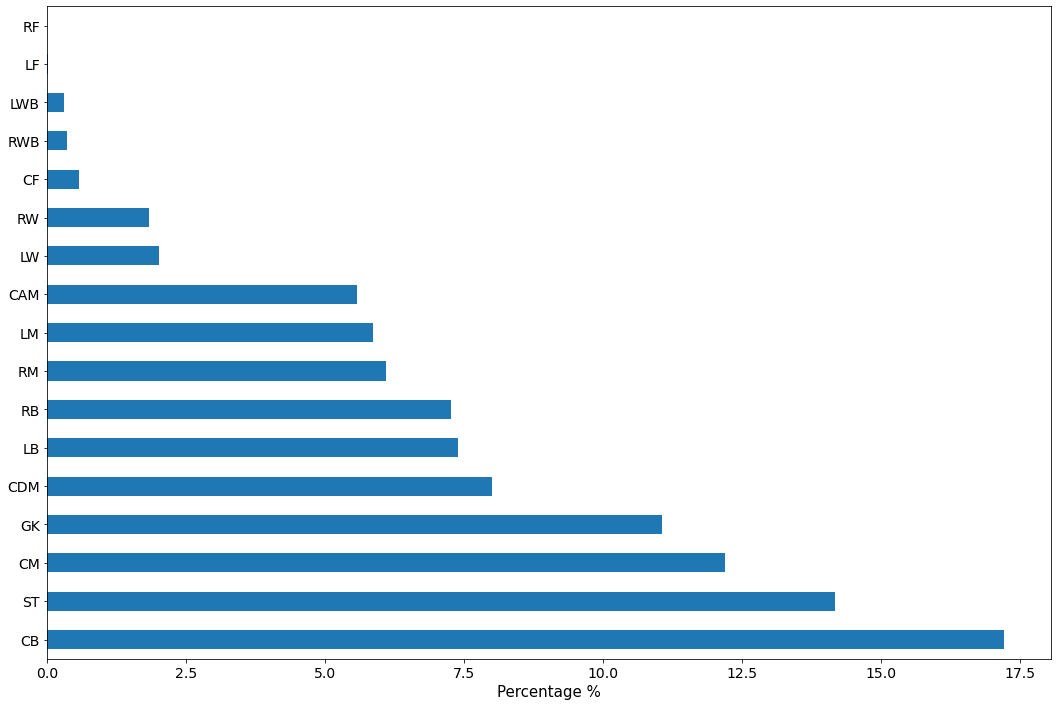

In [77]:
pos_series = new_df['position'].value_counts(normalize=True) * 100
pos_series.plot(kind='barh', figsize=(18, 12), fontsize=14)
plt.xlabel('Percentage %', fontsize=15);

Theo biểu đồ trên, ta nhận thấy được có 4 vị trí chiếm tỉ lệ rất thấp, đó chính là các vị trí **RF, LF, LWB, RWB**, nguyên nhân cho hiện tượng này liên quan trực tiếp đến xu hướng bóng đá hiện tại.

Để minh họa, hãy nhìn vào sơ đồ vị trí bóng đá sau đây:

<img src="imgs/position-defender.jpg" width="400"/>

Bắt đầu với hàng phòng ngự, sở dĩ hai vị trí **LWB** và **RWB** không xuất hiện nhiều là do hai vị trí này đã lỗi thời trong cách xây dựng đội hình thời điểm hiện tại. Vị trí **LWB** và **RWB** thuần túy được gọi là **hậu vệ tấn công biên** gồm hai biên trái và phải, sự xuất hiện của hai vị trí này đa phần sẽ thuộc vào đội hình có 5 hậu vệ (đội hình 5-3-2, 5-4-1,...). Với lối bóng đá hiện nay khi sử dụng đội hình 5 cầu thủ phòng ngự, các đội bóng thường sẽ linh hoạt đội hình giữa đội hình công và đội hình thủ, dễ thấy là đội tuyển Việt Nam (công: 3-5-2, thủ: 5-4-1). Vì tính chất đó, các đội bóng cần linh hoạt được vị trí của cầu thủ và các đội bóng sẽ có những biến hóa như sau:

- Phương án 1: Hai vị trí **LWB** và **RWB** sẽ được thay bằng hai hậu vệ cánh (**LB** và **RB**), hai vị trí **LB** và **RB** sẽ được đảm nhận bởi hai trung vệ (**CB**). Khi tấn công, hai **LB** và **RB** sẽ được đôn lên đá cao như hai tiền vệ cánh (**LM** và **RM**)
- Phương án 2: Hai vị trí **LWB** và **RWB** sẽ được thay bằng hai tiền vệ cánh (**LM** và **RM**). Khi phòng thủ **LM** và **RM** sẽ lùi sâu và đá như hai hậu vệ cánh (**LB** và **RB**)

Tiếp theo là hàng công, tương tự như trên, lối đá hiện tại đã khiến cho hai vị trí **LF** và **RF** không còn được trọng dụng. Tuy được sử dụng trong đội hình 3 tiền đạo, hai vị trí này lại chơi khá cục bộ ở trung lộ, gián tiếp tạo nên áp lực ở hai biên khi tiền vệ cánh phải dâng cao hơn bình thường khi tấn công, đặc biệt là khi đối đầu với các đội bóng có lối đá phòng thủ phản công nhanh. Do đó, người ta đã thay thế hai vị trí này bằng **LW** và **RW**, hai tiền đạo này sẽ đá rộng ở hai biên hơn.

Vì những lý do trên, cách tốt nhất hiện tại là gộp 4 vị trí trên thành 4 vị trí tương ứng:
- **RF -> RW**
- **LF -> LW**
- **LWB -> LB**
- **RWB -> RB**

#### Xử lý lại thuộc tính position

In [78]:
RF_index = tuned_df[tuned_df.position == 'RF'].index
LF_index = tuned_df[tuned_df.position == 'LF'].index
LWB_index = tuned_df[tuned_df.position == 'LWB'].index
RWB_index = tuned_df[tuned_df.position == 'RWB'].index

In [79]:
tuned_df.loc[RF_index, 'position'] = 'RW'
tuned_df.loc[LF_index, 'position'] = 'LW'
tuned_df.loc[LWB_index, 'position'] = 'LB'
tuned_df.loc[RWB_index, 'position'] = 'RB'

In [80]:
tuned_df.shape

(15525, 45)

Kiểm tra lại các vị trí sau khi cập nhật lại.

In [81]:
tuned_df.position.unique()

array(['ST', 'CM', 'CF', 'CAM', 'LW', 'CB', 'GK', 'RW', 'CDM', 'RM', 'LM',
       'RB', 'LB'], dtype=object)

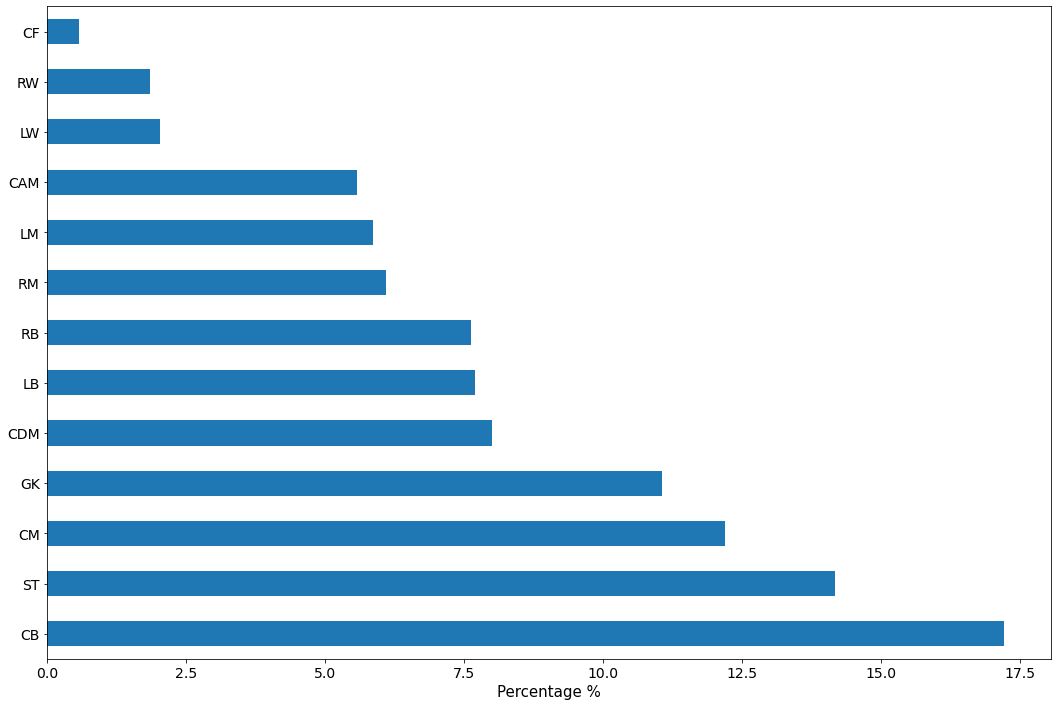

In [82]:
(tuned_df.position.value_counts(normalize=True) * 100).plot(kind='barh', figsize=(18, 12), fontsize=14)
plt.xlabel('Percentage %', fontsize=15);

### Xem xét các phân phối khác

In [83]:
def plot_distribution(df, gb, col, values):
    if col !='':
        df = df[df[col].isin(values)]
    distribution = df.groupby(gb).count()['position']
    distribution.plot.bar()
    plt.ylabel('count')
    if col == '':
        plt.title('age distribution')
    else:
        plt.title('age distribution with ' + col + ' is ' + str(values)) 
    plt.show()

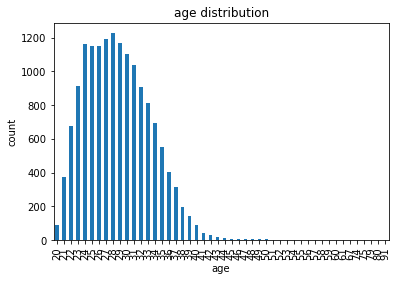

In [84]:
plot_distribution(tuned_df, 'age', '', [])

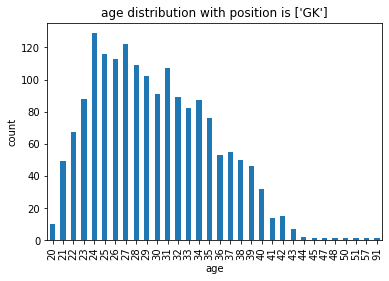

In [85]:
plot_distribution(tuned_df, 'age', 'position', ['GK'])

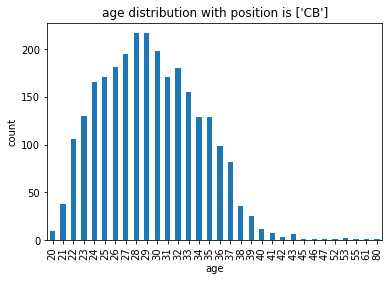

In [86]:
plot_distribution(tuned_df, 'age', 'position', ['CB'])

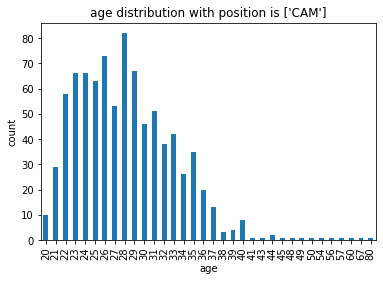

In [87]:
plot_distribution(tuned_df, 'age', 'position', ['CAM'])

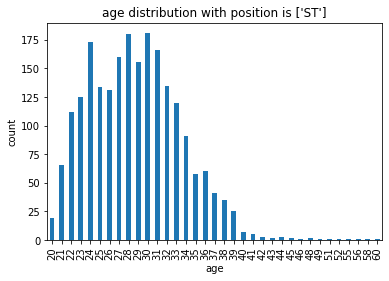

In [88]:
plot_distribution(tuned_df, 'age', 'position', ['ST'])

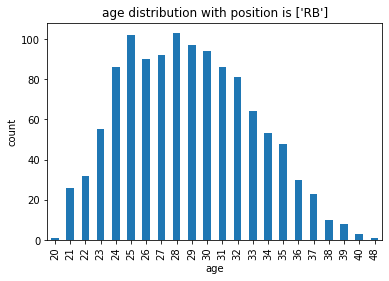

In [89]:
plot_distribution(tuned_df, 'age', 'position', ['RB'])

Phân phối số lượng cầu thủ theo tuổi tăng nhanh ở các tuổi từ 20 và đạt đỉnh ở tầm tuổi 29, 30. Sau đó, số lượng cầu thủ giảm dần với tốc độ chậm hơn so với lúc tăng. Và đa số các vị trị đều có phân phối tương tự như vậy (tăng nhanh đạt đỉnh ở tầm dưới 30 và giảm chậm dần vào các năm sau đó). Tuy nhiên, vị trí GK có phân phối tăng nhanh hơn và đạt đỉnh sớm hơn (tầm 24 tuổi) và giảm chậm hơn hẳn so với các vị trí khác.

### Tìm hiểu các chỉ số theo từng vị trí

In [90]:
def plot_mean(df, gb, col):
    temp = df.groupby(gb).mean()[col].sort_values()
    temp.plot.bar(figsize=(12, 10))
    plt.ylabel('mean')
    plt.title(col + ' mean group by ' + gb)
    plt.show()

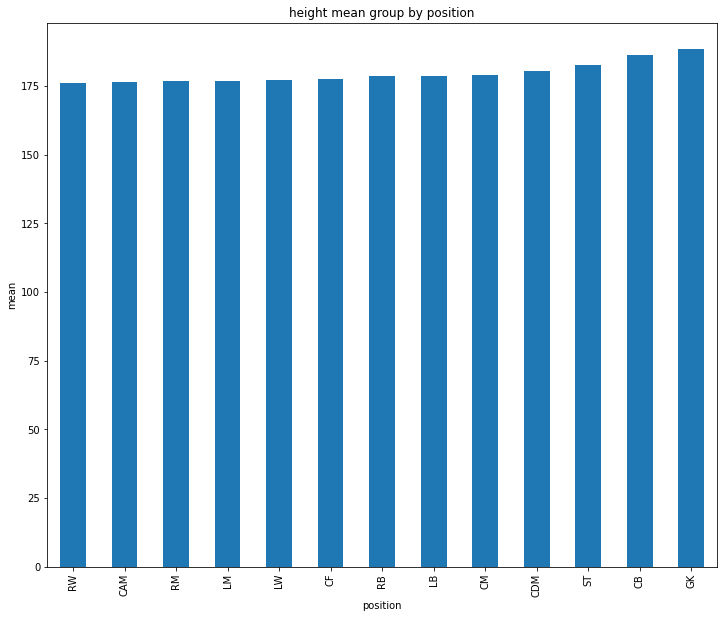

In [91]:
plot_mean(tuned_df, 'position', 'height')

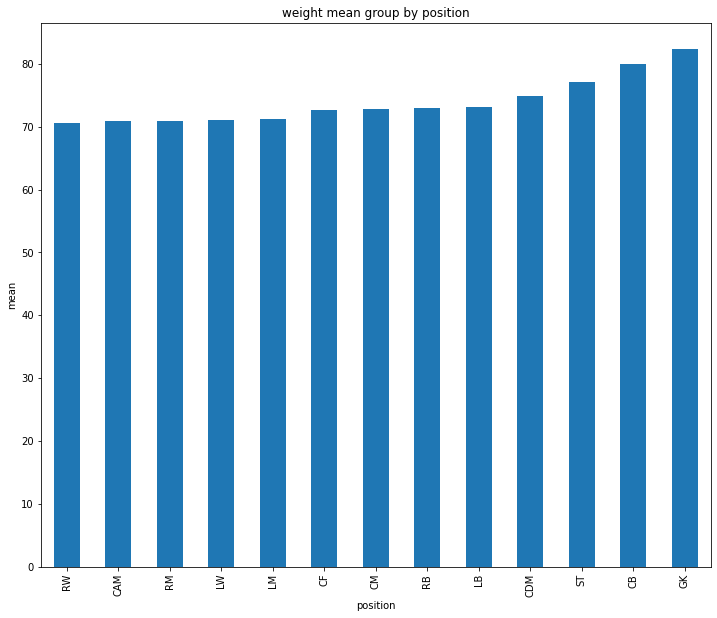

In [92]:
plot_mean(tuned_df, 'position', 'weight')

Dễ dàng thấy được, chiều cao và cân nặng trung bình của các cầu thủ ở vị trí trung tâm hoặc 2 cánh thấp hơn so với các cầu thủ đá ở trung tâm, và nhất là các vị trí gần với khung thành (ST, CB, GK). ST, CB và nhất là GK là 3 vị trí đòi hỏi khả năng tranh chấp bóng bổng, do đó, chiều cao và cân nặng của các cầu thử ở 3 vị trí đó tốt hơn các vị trí khác. Ngoài ra, vị trí CDM cũng là vị trí đòi hỏi tranh chấp khu vực giữa sân nên 2 chỉ số này cũng có phần cao hơn các vị trí khác. Ngược lại, các khu vực cho các vị trí xa khung thành, không yêu cầu tranh chấp bóng bổng nhiều như các cầu thủ chơi cánh hoặc tiền vệ công thì lại có 2 chỉ số này không tốt bằng các vị trí kể trên.

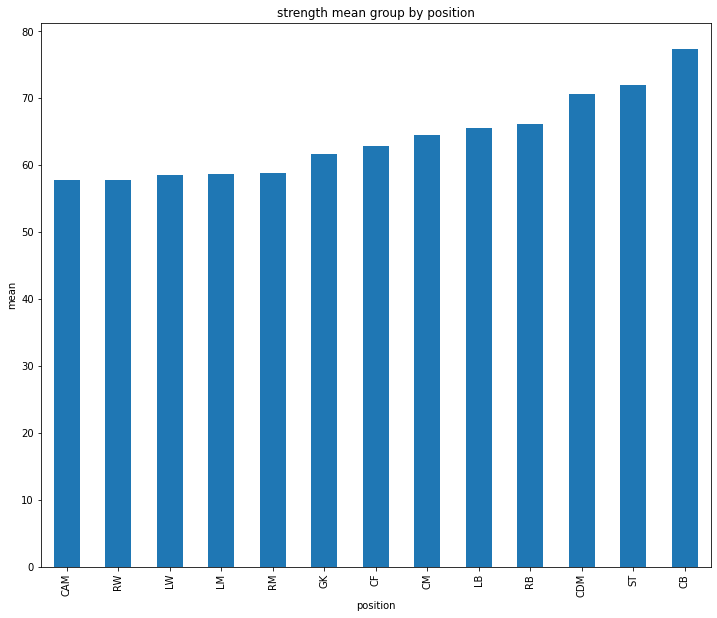

In [93]:
plot_mean(tuned_df, 'position', 'strength')

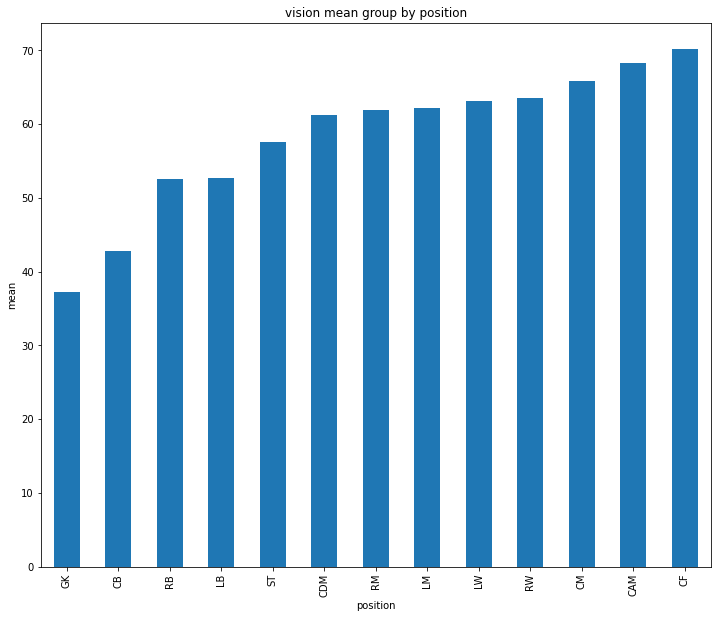

In [94]:
plot_mean(tuned_df, 'position', 'vision')

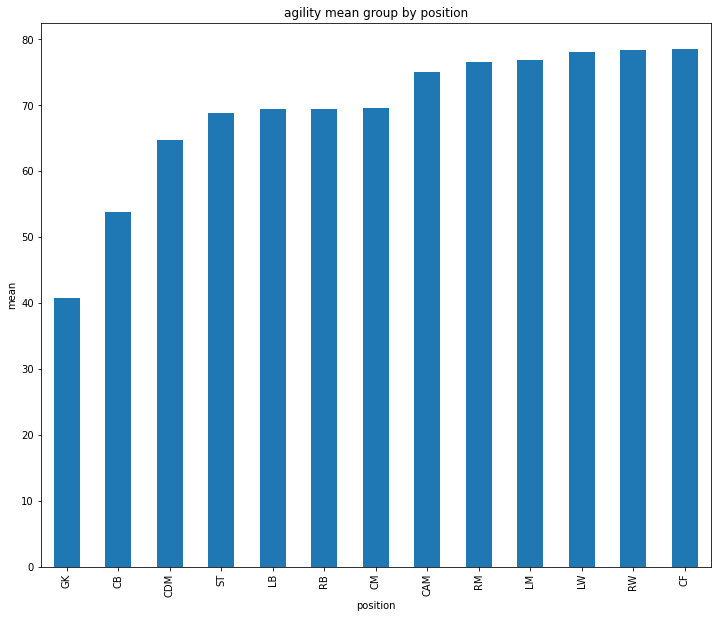

In [95]:
plot_mean(tuned_df, 'position', 'agility')

Thua thiệt về chiều cao, cân nặng và sức mạnh nhưng các tiền đạo cánh, tiền vệ và các hậu về cánh lại có chỉ số tầm nhìn và nhanh nhẹn tốt hơn. Đây cũng là cách họ đóng góp vào lối chơi của đội bóng, sử dụng khả năng quan sát và tư duy để kiến tạo lối chơi. Đặc biệt, vị trí CF là vị trí có 2 chỉ số này tốt nhất. Còn lại, các vị trí cánh thì nhanh nhẹn hơn các vị trí trung tâm và ngược lại, các cầu thủ trung tâm có tầm nhìn tốt hơn các đồng đội ở cánh.

### Tìm hiểu các chỉ số theo tuổi (và vị trí)

In [96]:
def scatter_by_age_position(df, positions, col):
    if len(positions)!=0:
        df[df['position'].isin(positions)].plot.scatter(x='age',y=col)
    else:
        df.plot.scatter(x='age', y=col)

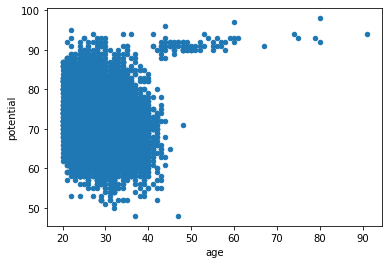

In [97]:
scatter_by_age_position(tuned_df, [], 'potential')

Dễ hiểu và dễ thấy, chỉ số tiềm năng tỉ lệ nghịch với số tuổi (ta thấy, đa phần các chấm tập trung thành một hình elip có trục lớn đi xuống)

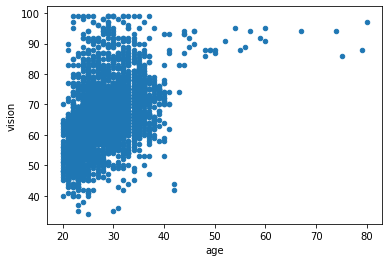

In [98]:
scatter_by_age_position(tuned_df, ['CF', 'CAM', 'CM', 'RW', 'LW', 'CM'], 'vision')

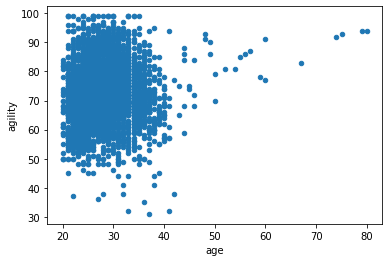

In [99]:
scatter_by_age_position(tuned_df, ['CF', 'CAM', 'CM', 'RW', 'LW', 'CM'], 'agility')

Đối với các vị trí yêu cầu về tầm nhìn, chỉ số này tỉ lệ thuận với tuổi cầu thủ. Tuy nhiên, cũng các vị trí đấy (cũng yêu cầu cao về nhanh nhẹn) thì độ nhanh nhẹn lại không có liên quan nhiều và rõ rệt với tuổi tác.

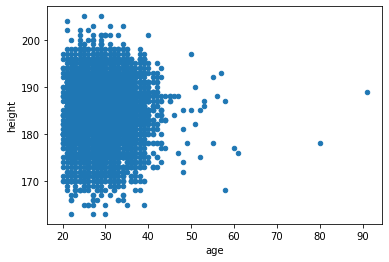

In [100]:
strong_pos=['ST', 'CDM', 'CB', 'GK']
scatter_by_age_position(tuned_df, strong_pos, 'height')

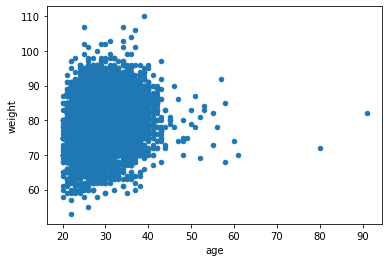

In [101]:
scatter_by_age_position(tuned_df, strong_pos, 'weight')

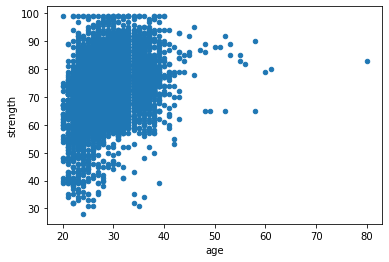

In [102]:
scatter_by_age_position(tuned_df, ['ST', 'CDM', 'CB'], 'strength')

Xét vị trí yêu cầu chiều cao và cân nặng (ST, CDM, CB, GK) và các chỉ số này, ta thấy chỉ số chiều cao là chỉ số không nhiều sự thay đổi theo thời gian. Ngược lại, cân nặng lại có xu hướng tỉ lệ thuận với tuổi. Cùng với đó, với 3 vị trí ST, CDM, CB thì chỉ số sức mạnh tỉ lệ thuận với tuổi tác. Từ đó, ta có thể hiểu được, vì là thi đấu ở các vị trí thường xuyên tranh chấp, 3 vị trí này phải tăng cường sức khỏe và cân nặng để có được lợi thế trong các tình huống tì đè, đối mặt.

## Bài toán: Phân loại vị trí của cầu thủ

Với bài toán phân loại vị trí cầu thủ, ta sẽ lựa chọn output là thuộc tính **position**. Trước tiên, ta cần xử lý nhãn cho output bằng cách chuyển các vị trí sang số thích hợp.

In [103]:
labelEncode = LabelEncoder()
target = labelEncode.fit_transform(tuned_df.position)
target

array([12,  4,  3, ...,  7,  5,  4])

Kiểm tra lại các lớp đã thực hiện encode.

In [104]:
labelEncode.classes_

array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM',
       'RW', 'ST'], dtype=object)

Ta tiến hành xử lý lại dữ liệu mới với thuộc tính position đã được encode.

In [105]:
tuned_data = tuned_df.copy()
tuned_data.position = target
tuned_data

,position,composure,height,weight,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,atkWorkRate,defWorkRate,rating
fullName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C. Ronaldo dos Santos Aveiro,12,99,187,83,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,High,Low,99
Luka Modrić,4,91,172,66,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,High,High,99
Lionel Messi,3,99,170,72,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,Medium,Medium,99
Edson Arantes Nascimento,0,98,173,70,80,95,59,94,93,97,Right,5,90,89,96,98,89,13,6,11,8,7,94,67,88,88,94,55,93,97,98,98,96,94,49,95,53,86,76,97,95,4,High,Medium,98
Neymar da Silva Santos Jr.,0,97,175,68,29,99,81,99,87,98,Right,5,90,99,99,99,99,9,9,15,15,11,96,56,88,89,93,42,92,99,93,97,96,91,51,95,37,99,71,99,96,5,High,Medium,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guobo Liu,4,43,189,75,21,62,55,79,68,40,Right,2,31,36,45,32,33,9,13,8,9,8,42,39,55,51,39,48,41,54,66,45,53,45,43,63,35,61,48,48,38,3,Medium,Medium,48
Xin Wang,9,33,182,70,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,High,Medium,48
Morgan Roberts,7,47,178,68,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,Medium,Low,48


Tiến hành tách tập dữ liệu thành X và y. Loại bỏ cả **rating** khỏi X là do khả năng cao thuộc tính **rating** có thể được suy đoán từ các thuộc tính còn lại, vì thế ta có thể bỏ **rating** ra khỏi X.

In [106]:
y = tuned_data.position
X = tuned_data.drop(columns=['position', 'rating'])

Sau đó, xử lý tách thành các tập train, validation và test (tỉ lệ (train + validation)/test: 80/20, tỉ lệ train/validation: 80/20)

In [107]:
X_train_full , X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [108]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)

### Tiền xử lý tập train

Xác định các biến định tính và định lượng.

In [109]:
nume_cols = list(X_train.dtypes[X_train.dtypes==np.int64].index)
cat_cols = list(X_train.dtypes[X_train.dtypes==object].index)
print("Numeric columns: ", nume_cols)
print()
print("Categorical columns: ", cat_cols)

Numeric columns:  ['composure', 'height', 'weight', 'age', 'acceleration', 'aggression', 'agility', 'balance', 'ballcontrol', 'skillMoves', 'crossing', 'curve', 'dribbling', 'finishing', 'freekickaccuracy', 'gkdiving', 'gkhandling', 'gkkicking', 'gkpositioning', 'gkreflexes', 'headingaccuracy', 'interceptions', 'jumping', 'longpassing', 'longshots', 'marking', 'penalties', 'positioning', 'potential', 'reactions', 'shortpassing', 'shotpower', 'slidingtackle', 'sprintspeed', 'standingtackle', 'stamina', 'strength', 'vision', 'volleys', 'weakFoot']

Categorical columns:  ['foot', 'atkWorkRate', 'defWorkRate']


Với các biến định tính, ta One-Hot encode cho thuộc tính **foot** và Ordinal encode cho các biến **atkWorkRate** và **defWorkRate**. Với các biến định lượng thực hiện chuẩn hóa lại dữ liệu với **StandardScaler()**

In [110]:
oneHotCol = ['foot']
ordinalCol = ['atkWorkRate', 'defWorkRate']

Tiến hành xây dựng pipeline để tiền xử lý.

In [111]:
preprocess_pipeline = make_column_transformer((StandardScaler(), nume_cols), 
                                              (OneHotEncoder(handle_unknown='ignore'), oneHotCol), 
                                              (OrdinalEncoder(), ordinalCol))
preprocess_pipeline

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['composure', 'height', 'weight', 'age',
                                  'acceleration', 'aggression', 'agility',
                                  'balance', 'ballcontrol', 'skillMoves',
                                  'crossing', 'curve', 'dribbling', 'finishing',
                                  'freekickaccuracy', 'gkdiving', 'gkhandling',
                                  'gkkicking', 'gkpositioning', 'gkreflexes',
                                  'headingaccuracy', 'interceptions', 'jumping',
                                  'longpassing', 'longshots', 'marking',
                                  'penalties', 'positioning', 'potential',
                                  'reactions', ...]),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['foot']),
                                ('ordinalencoder', OrdinalEncoder(),
                                 ['atkWorkRate', 'defWorkRate'])])

Kiểm tra lại kết quả xử lý tập train

In [112]:
preprocessed_train_X = preprocess_pipeline.fit_transform(X_train)

In [113]:
preprocessed_train_X.shape

(9936, 44)

In [114]:
X_train.shape

(9936, 43)

Với pipeline này, ta có thể tiền xử lý dữ liệu đầu vào dựa vào những giá trị đã quan sát được ở tập train. Bây giờ chúng ta có thể xây dựng mô hình.

### Xây dựng mô hình

#### Mạng neural nhân tạo MLPClassifier

Dữ liệu sẽ được đưa vào mô hình MLPClassifier để phân loại vị trí của cầu thủ, trong quá trình train sẽ thay đổi lại giá trị alpha để giảm khả năng overfitting và sẽ chọn ra alpha tốt nhất cho bài toán.

In [115]:
classifier = MLPClassifier(hidden_layer_sizes=50, activation='relu', solver='adam', random_state=0, max_iter=1000)
alphas = [0.01, 0.1, 1, 10, 100]
net_pipeline = Pipeline(steps=[('clean', preprocess_pipeline), ('net', classifier)])
best_val_err = float('inf')
best_alpha = None
for alp in alphas:
    net_pipeline['net'].set_params(alpha=alp)
    net_pipeline.fit(X_train, y_train)
    train_err = 1 - net_pipeline.score(X_train, y_train)
    valid_err = 1 - net_pipeline.score(X_valid, y_valid)
    if valid_err < best_val_err:
        best_val_err = valid_err
        best_alpha = alp
            
"Finish!"

'Finish!'

Tinh chỉnh lại giá trị alpha.

In [116]:
net_pipeline['net'].set_params(alpha=best_alpha)

MLPClassifier(alpha=1, hidden_layer_sizes=50, max_iter=1000, random_state=0)

Fit lại mô hình với tập train.

In [117]:
net_pipeline.fit(X_train, y_train);

Độ chính xác của mô hình sau khi dự đoán tập test.

In [118]:
net_pipeline.score(X_test, y_test)

0.7365539452495974

#### Mô hình k-Nearest Neighbors

Để chọn ra giá trị k_neighbor tốt nhất, ta sẽ sử dụng module GridSearchCV và khởi tạo tham số cần thiết. Ở đây, ta sẽ kiểm tra khả năng dự đoán với số lượng neighbors tăng dần từ 1 đến 20.

In [119]:
knn_pipeline = Pipeline(steps=[('clean', preprocess_pipeline), ('knn', KNeighborsClassifier())])
params_knn = {
    'knn__n_neighbors': range(1, 20)
    }
search_knn = GridSearchCV(estimator=knn_pipeline, param_grid=params_knn, cv=5, return_train_score=True)

Do GridSearchCV sẽ trả về bộ tham số có kết quả dự đoán trên tập train là tốt nhất, vì thế ta nên gộp tập train và tập validation lại để có nhiều dữ liệu hơn.

In [120]:
search_knn.fit(X_train_full, y_train_full)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['composure',
                                                                          'height',
                                                                          'weight',
                                                                          'age',
                                                                          'acceleration',
                                                                          'aggression',
                                                                          'agility',
                                                                          'balance',
                                                                          'ballcontrol',
                                                                          'skillMoves',
                                                                          'crossing',
                                                                          'curve',
                                                                          'dribbling',
                                                                          'finishing',
                                                                          'freekickaccuracy',
                                                                          'gkdiving',
                                                                          'gkhandling',
                                                                          'gkkicking',
                                                                          'gkpositioning',
                                                                          'gkr...
                                                                          'interceptions',
                                                                          'jumping',
                                                                          'longpassing',
                                                                          'longshots',
                                                                          'marking',
                                                                          'penalties',
                                                                          'positioning',
                                                                          'potential',
                                                                          'reactions', ...]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['foot']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['atkWorkRate',
                                                                          'defWorkRate'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)},
             return_train_score=True)

In [121]:
print(f"Độ chính xác tốt nhất là {search_knn.best_score_} với số lượng neighbors là {search_knn.best_params_}")

Độ chính xác tốt nhất là 0.6860708534621578 với số lượng neighbors là {'knn__n_neighbors': 19}


Có thể thấy được, kết quả dự đoán từ hai mô hình trên là tương đối ổn, tuy nhiên vẫn chưa tốt như mong đợi. Độ chính xác thấp như vậy có thể là do sự khó lường của dữ liệu, khi mối quan hệ giữa vị trí trong bóng đá và chỉ số cá nhân của cầu thủ là vô cùng đa dạng.

Do đó, ta có thể mở rộng bài toán bằng cách xử lý lại output của mình

## Bài toán mở rộng

Do lối chơi và khả năng cá nhân mỗi cầu thủ là vô cùng đa dạng, khá khó để có thể dự đoán chính xác được vị trí cụ thể của từng cá nhân, vì thế thay vì dự đoán cụ thể vị trí của cầu thủ, ta sẽ phân loại lại cầu thủ theo hàng công, tuyến giữa, hàng phòng ngự và vị trí thủ môn.

4 lớp mới của ta sẽ là: **ATK, MID, DEF, GK**

Xác định lại vị trí theo từng khu vực nhất định.

In [137]:
ATK = ['ST', 'CF', 'LW', 'RW']
MID = ['CM', 'CAM', 'CDM', 'RM', 'LM']
DEF = ['CB', 'RB', 'LB']

Tiến hành thay đổi lại đầu ra.

In [138]:
ATK_index = tuned_df[tuned_df.position.isin(ATK)].index
MID_index = tuned_df[tuned_df.position.isin(MID)].index
DEF_index = tuned_df[tuned_df.position.isin(DEF)].index

In [139]:
min_df = tuned_df.copy()

In [140]:
min_df.loc[ATK_index, 'position'] = 'ATK'
min_df.loc[MID_index, 'position'] = 'MID'
min_df.loc[DEF_index, 'position'] = 'DEF'

Kiểm tra lại đầu ra mới.

In [141]:
min_df.position.unique()

array(['ATK', 'MID', 'DEF', 'GK'], dtype=object)

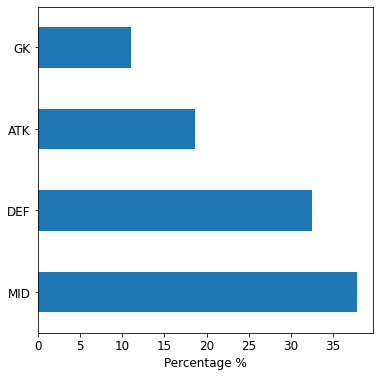

In [142]:
(min_df.position.value_counts(normalize=True) * 100).plot(kind='barh', figsize=(6, 6), fontsize=12)
plt.xlabel('Percentage %', fontsize=12);

Tiến hành encode lại output.

In [143]:
minLabelEncode = LabelEncoder()
min_target = minLabelEncode.fit_transform(min_df.position)
min_target

array([0, 3, 0, ..., 3, 2, 3])

Kiểm tra lại dữ liệu.

In [144]:
min_df.position = min_target
min_df

,position,composure,height,weight,age,acceleration,aggression,agility,balance,ballcontrol,foot,skillMoves,crossing,curve,dribbling,finishing,freekickaccuracy,gkdiving,gkhandling,gkkicking,gkpositioning,gkreflexes,headingaccuracy,interceptions,jumping,longpassing,longshots,marking,penalties,positioning,potential,reactions,shortpassing,shotpower,slidingtackle,sprintspeed,standingtackle,stamina,strength,vision,volleys,weakFoot,atkWorkRate,defWorkRate,rating
fullName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C. Ronaldo dos Santos Aveiro,0,99,187,83,36,95,75,94,76,99,Right,5,98,95,95,99,89,7,11,15,14,11,99,41,99,90,99,40,90,99,94,99,95,99,32,98,44,99,95,96,92,4,High,Low,99
Luka Modrić,3,91,172,66,35,94,83,99,99,99,Right,4,94,93,97,89,85,13,9,7,14,9,73,99,91,96,99,80,99,97,91,97,99,97,98,85,99,99,77,99,94,4,High,High,99
Lionel Messi,0,99,170,72,34,99,66,93,97,99,Left,4,85,99,99,99,99,6,11,15,14,8,98,30,94,96,99,46,81,99,94,97,99,92,36,94,39,99,82,99,93,4,Medium,Medium,99
Edson Arantes Nascimento,3,98,173,70,80,95,59,94,93,97,Right,5,90,89,96,98,89,13,6,11,8,7,94,67,88,88,94,55,93,97,98,98,96,94,49,95,53,86,76,97,95,4,High,Medium,98
Neymar da Silva Santos Jr.,3,97,175,68,29,99,81,99,87,98,Right,5,90,99,99,99,99,9,9,15,15,11,96,56,88,89,93,42,92,99,93,97,96,91,51,95,37,99,71,99,96,5,High,Medium,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Guobo Liu,3,43,189,75,21,62,55,79,68,40,Right,2,31,36,45,32,33,9,13,8,9,8,42,39,55,51,39,48,41,54,66,45,53,45,43,63,35,61,48,48,38,3,Medium,Medium,48
Xin Wang,1,33,182,70,23,66,50,70,65,35,Right,2,41,33,58,26,31,10,12,8,8,12,35,48,64,29,28,49,33,48,58,46,38,29,43,56,43,63,49,32,25,3,High,Medium,48
Morgan Roberts,3,47,178,68,20,69,34,53,69,44,Left,2,54,53,42,44,57,9,13,12,15,9,21,18,30,44,42,23,44,42,66,35,45,48,26,62,25,39,45,48,37,2,Medium,Low,48


Tiến hành tách các tập X, y

In [145]:
y = min_df.position
X = min_df.drop(columns=['rating', 'position'])

Sau đó, xử lý tách thành các tập train, validation và test (tỉ lệ (train + validation)/test: 80/20, tỉ lệ train/validation: 80/20)

In [146]:
X_train_full , X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [147]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=1)

### Tiền xử lý tập train

Sử dụng lại pipeline phía trên, áp dụng và kiểm tra lại dữ liệu sau khi xử lý.

In [148]:
preprocessed_train_X = preprocess_pipeline.fit_transform(X_train)

In [149]:
preprocessed_train_X.shape

(9936, 44)

In [150]:
X_train.shape

(9936, 43)

### Xây dựng lại mô hình

#### Mạng neural nhân tạo MLPClassifier

In [152]:
classifier = MLPClassifier(hidden_layer_sizes=50, activation='relu', solver='adam', random_state=0, max_iter=1000)
alphas = [0.01, 0.1, 1, 10, 100]
net_pipeline = Pipeline(steps=[('clean', preprocess_pipeline), ('net', classifier)])
best_val_err = float('inf')
best_alpha = None
for alp in alphas:
    net_pipeline['net'].set_params(alpha=alp)
    net_pipeline.fit(X_train, y_train)
    train_err = 1 - net_pipeline.score(X_train, y_train)
    valid_err = 1 - net_pipeline.score(X_valid, y_valid)
    if valid_err < best_val_err:
        best_val_err = valid_err
        best_alpha = alp
            
"Finish!"

'Finish!'

Tinh chỉnh lại tham số tốt nhất.

In [154]:
net_pipeline['net'].set_params(alpha=best_alpha)

MLPClassifier(alpha=1, hidden_layer_sizes=50, max_iter=1000, random_state=0)

Fit lại mô hình với tập train.

In [155]:
net_pipeline.fit(X_train, y_train)

Pipeline(steps=[('clean',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['composure', 'height',
                                                   'weight', 'age',
                                                   'acceleration', 'aggression',
                                                   'agility', 'balance',
                                                   'ballcontrol', 'skillMoves',
                                                   'crossing', 'curve',
                                                   'dribbling', 'finishing',
                                                   'freekickaccuracy',
                                                   'gkdiving', 'gkhandling',
                                                   'gkkicking', 'gkpositioning',
                                                   'gkreflexes',
                                                   'headingaccuracy',
                                                   'interceptions', 'jumping',
                                                   'longpassing', 'longshots',
                                                   'marking', 'penalties',
                                                   'positioning', 'potential',
                                                   'reactions', ...]),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['foot']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['atkWorkRate',
                                                   'defWorkRate'])])),
                ('net',
                 MLPClassifier(alpha=1, hidden_layer_sizes=50, max_iter=1000,
                               random_state=0))])

Độ chính xác của mô hình sau khi dự đoán tập test.

In [156]:
net_pipeline.score(X_test, y_test) # Result on MLPClassifier

0.8969404186795491

#### Mô hình k-Nearest Neighbors

Sử dụng lại workflow như bài toán trước, áp dụng GridSearchCV và khởi tạo tham số cần thiết, ta sẽ kiểm tra khả năng dự đoán với số lượng neighbors tăng dần từ 1 đến 20.

In [157]:
knn_pipeline = Pipeline(steps=[('clean', preprocess_pipeline), ('knn', KNeighborsClassifier())])
params_knn = {
    'knn__n_neighbors': range(1, 20)
    }
search_knn = GridSearchCV(estimator=knn_pipeline, param_grid=params_knn, cv=5, return_train_score=True)

In [158]:
search_knn.fit(X_train_full, y_train_full)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clean',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['composure',
                                                                          'height',
                                                                          'weight',
                                                                          'age',
                                                                          'acceleration',
                                                                          'aggression',
                                                                          'agility',
                                                                          'balance',
                                                                          'ballcontrol',
                                                                          'skillMoves',
                                                                          'crossing',
                                                                          'curve',
                                                                          'dribbling',
                                                                          'finishing',
                                                                          'freekickaccuracy',
                                                                          'gkdiving',
                                                                          'gkhandling',
                                                                          'gkkicking',
                                                                          'gkpositioning',
                                                                          'gkr...
                                                                          'interceptions',
                                                                          'jumping',
                                                                          'longpassing',
                                                                          'longshots',
                                                                          'marking',
                                                                          'penalties',
                                                                          'positioning',
                                                                          'potential',
                                                                          'reactions', ...]),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['foot']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(),
                                                                         ['atkWorkRate',
                                                                          'defWorkRate'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20)},
             return_train_score=True)

In [160]:
print(f"Độ chính xác tốt nhất là {search_knn.best_score_} với số lượng neighbors là {search_knn.best_params_}")

Độ chính xác tốt nhất là 0.877536231884058 với số lượng neighbors là {'knn__n_neighbors': 18}


Có thể thấy được ở lần này, kết quả phân lớp đã tốt hơn rất nhiều khi chúng ta trừu tượng hóa đầu ra lần này hơn so với đầu ra ở bài toán ban đầu.

**Kết luận**: Đồ án lần này đã cho chúng em khá nhiều niềm vui trong việc khám phá dữ liệu, đặc biệt là trong lĩnh vực yêu thích của cả hai thành viên là game và bóng đá. Không những thế, việc thực hiện đồ án giúp chúng em có thêm nhiều kiến thức mới trong lĩnh vực Data Science. Mặc dù đã cố gắng thực hiện đồ án, song chúng em cũng không thể tránh khỏi những khó khăn và thiếu sót trong quá trình làm việc, khó khăn lớn nhất là tìm kiếm data API để có thể thực hiện đồ án. Vì vậy, nếu có thêm thời gian nhóm chúng em sẽ cố gắng tìm kiếm những nguồn dữ liệu chất lượng tốt hơn, nghiên cứu thêm nhiều cách xử lý dữ liệu hơn, cũng như tìm hiểu và cài đặt nhiều mô hình hơn.